In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import subprocess
import os

In [5]:
X_test_original = np.load("../../data/X_test.npy")
X_train_original = np.load("../../data/X_train.npy")
Y_test_original = np.load("../../data/Y_test.npy")
Y_train_original = np.load("../../data/Y_train.npy")

In [6]:
X_train_videos = np.load("../../data/X_train_videos.npy")
X_test_videos = np.load("../../data/X_test_videos.npy")

In [7]:
print X_train_videos[0]
counter = 1
for index in range(len(X_train_videos)-1):
    if X_train_videos[index] != X_train_videos[index+1]:
        counter += 1
print counter
print len(X_train_videos)

38
203
10438


In [34]:
import Image
from scipy.misc import imread, imsave, imresize
frame = 0
avg_images = np.array(np.zeros(shape = (counter,240,320,3) , dtype='uint64'))
for video in range(counter):
    frames_count = 0
    while X_train_videos[frame] == X_train_videos[frame+1]:
        frames_count += 1
        avg_images[video] += X_train_original[frame]
        if (frame + 2) < len(X_train_videos):
            frame += 1
        else:
            break
    if (frame+3) < len(X_train_videos):
        frame += 1
    avg_images[video] = avg_images[video] / (frames_count)

import os
import shutil
objects = os.listdir('../../data/')
if "avg_images" in objects:
    shutil.rmtree('../../data/avg_images/')
os.makedirs('../../data/avg_images')

for index in range(counter):
    imsave('../../data/avg_images/' + "%03d" % index +'.jpg' , avg_images[index].astype('uint8'))
np.save("../../data/X_test_averages.npy" , avg_images.astype('uint8'))

In [143]:
import sys
sys.path.append('../preprocessing')

In [146]:
import avg_img

In [147]:
avg_img.get_average_images("X_test.npy","X_test_videos.npy","avg_im_test","X_test_avg.npy")

In [5]:
def background_substraction(X_fname , X_videos_fname , X_avg_fname , X_dest_fname):
    X_train = np.load("../../data/" + X_fname)
    X_train_videos = np.load("../../data/" + X_videos_fname)
    X_train_avg = np.load("../../data/" + X_avg_fname)
    video = 0
    X_train_no_bg = np.array(np.zeros(shape = X_train.shape , dtype='uint8'))
    for index in len(X_train):
        X_train_no_bg[index] = X_train[index] - X_train_avg[video]
        if index+1 < len(X_train_videos):
            if X_train_videos[index] != X_train_videos[index + 1]:
                video += 1
    np.save("../../data/" + X_dest_fname , X_train_no_bg)

In [3]:
X_train = np.load("../../data/X_train.npy")
X_train_videos = np.load("../../data/X_train_videos.npy")
X_train_avg = np.load("../../data/X_train_avg.npy")


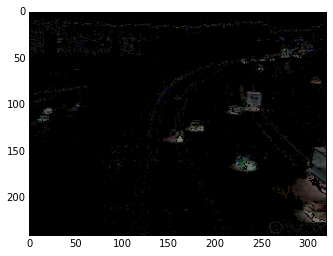

In [120]:
def background_substraction(X_fname , X_videos_fname , X_avg_fname , X_dest_fname):
    X_train = np.load("../../data/" + X_fname)
    X_train_videos = np.load("../../data/" + X_videos_fname)
    X_train_avg = np.load("../../data/" + X_avg_fname)
    video = 0
    X_train_no_bg = np.array(np.zeros(shape = X_train.shape , dtype='uint8'))
    for index in range(len(X_train)):
        X_train_no_bg[index] = (abs(X_train[index].astype('int8') - X_train_avg[video].astype('int8'))).astype('uint8')
        for i in range(X_train_no_bg[index].shape[0]):
            for j in range(X_train_no_bg[index].shape[1]):
                if (X_train_no_bg[index][i][j][0] + X_train_no_bg[index][i][j][1] + X_train_no_bg[index][i][j][2]  < 50) :
                    X_train_no_bg[index][i][j] = np.array(np.zeros(shape = X_train_no_bg[index][i][j].shape , dtype='uint8'))
        if index+1 < len(X_train_videos):
            if X_train_videos[index] != X_train_videos[index + 1]:
                video += 1
    np.save("../../data/" + X_dest_fname , X_train_no_bg)
    pass

In [117]:
X_train_no_bg[0] = (abs(X_train[0].astype('int8') - X_train_avg[0].astype('int8'))).astype('uint8')
for i in range(X_train_no_bg[0].shape[0]):
        for j in range(X_train_no_bg[0].shape[1]):
            if (X_train_no_bg[0][i][j][0] + X_train_no_bg[0][i][j][1] + X_train_no_bg[0][i][j][2]  < 50) :
                X_train_no_bg[0][i][j] = np.array(np.zeros(shape = X_train_no_bg[0][i][j].shape , dtype='uint8'))

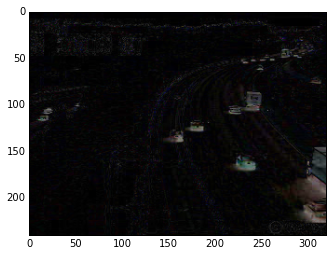

In [121]:
plt.imshow((abs(X_train[0].astype('int8') - X_train_avg[0].astype('int8'))).astype('uint8'))

In [90]:
test = np.array(np.zeros(shape = X_train_no_bg[0].shape , dtype='uint8'))
for i in range(X_train_no_bg[0].shape[0]):
        for j in range(X_train_no_bg[0].shape[1]):
            if (X_train_no_bg[0][i][j][0] + X_train_no_bg[0][i][j][1] + X_train_no_bg[0][i][j][2]  > 80) :
                test[i][j][0] = 255
                test[i][j][1] = 255
                test[i][j][2] = 255

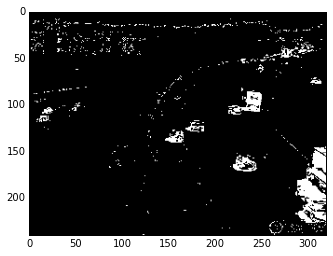

In [91]:
plt.imshow(test)

In [92]:
from scipy.misc import imread , imsave , imresize
def img_resize(img,t):
    return imresize(img, (img.shape[0] / t , img.shape[1] / t))

In [128]:
def get_cars(frame):
    #frame = 20
    test = np.array(np.zeros(shape = X_train_no_bg[frame].shape , dtype='uint8'))
    for i in range(X_train_no_bg[frame].shape[0]):
        for j in range(X_train_no_bg[frame].shape[1]):
            if (X_train_no_bg[frame][i][j][0] + X_train_no_bg[frame][i][j][1] + X_train_no_bg[frame][i][j][2]  > 80) :
                test[i][j][0] = 255
                test[i][j][1] = 255
                test[i][j][2] = 255
    for i in range(0, test.shape[0]-4, 4):
        for j in range(0 , test.shape[1]-4, 4):
            counter = 0
            for k in range (4):
                for m in range(4):
                    if test[i+k][j+m][0] == 0:
                        counter += 1
            if counter>11:
                for k in range (4):
                    for m in range(4):
                        for l in range(3):
                            test[i+k][j+m][l] = 0
    return test
#plt.imshow(test)

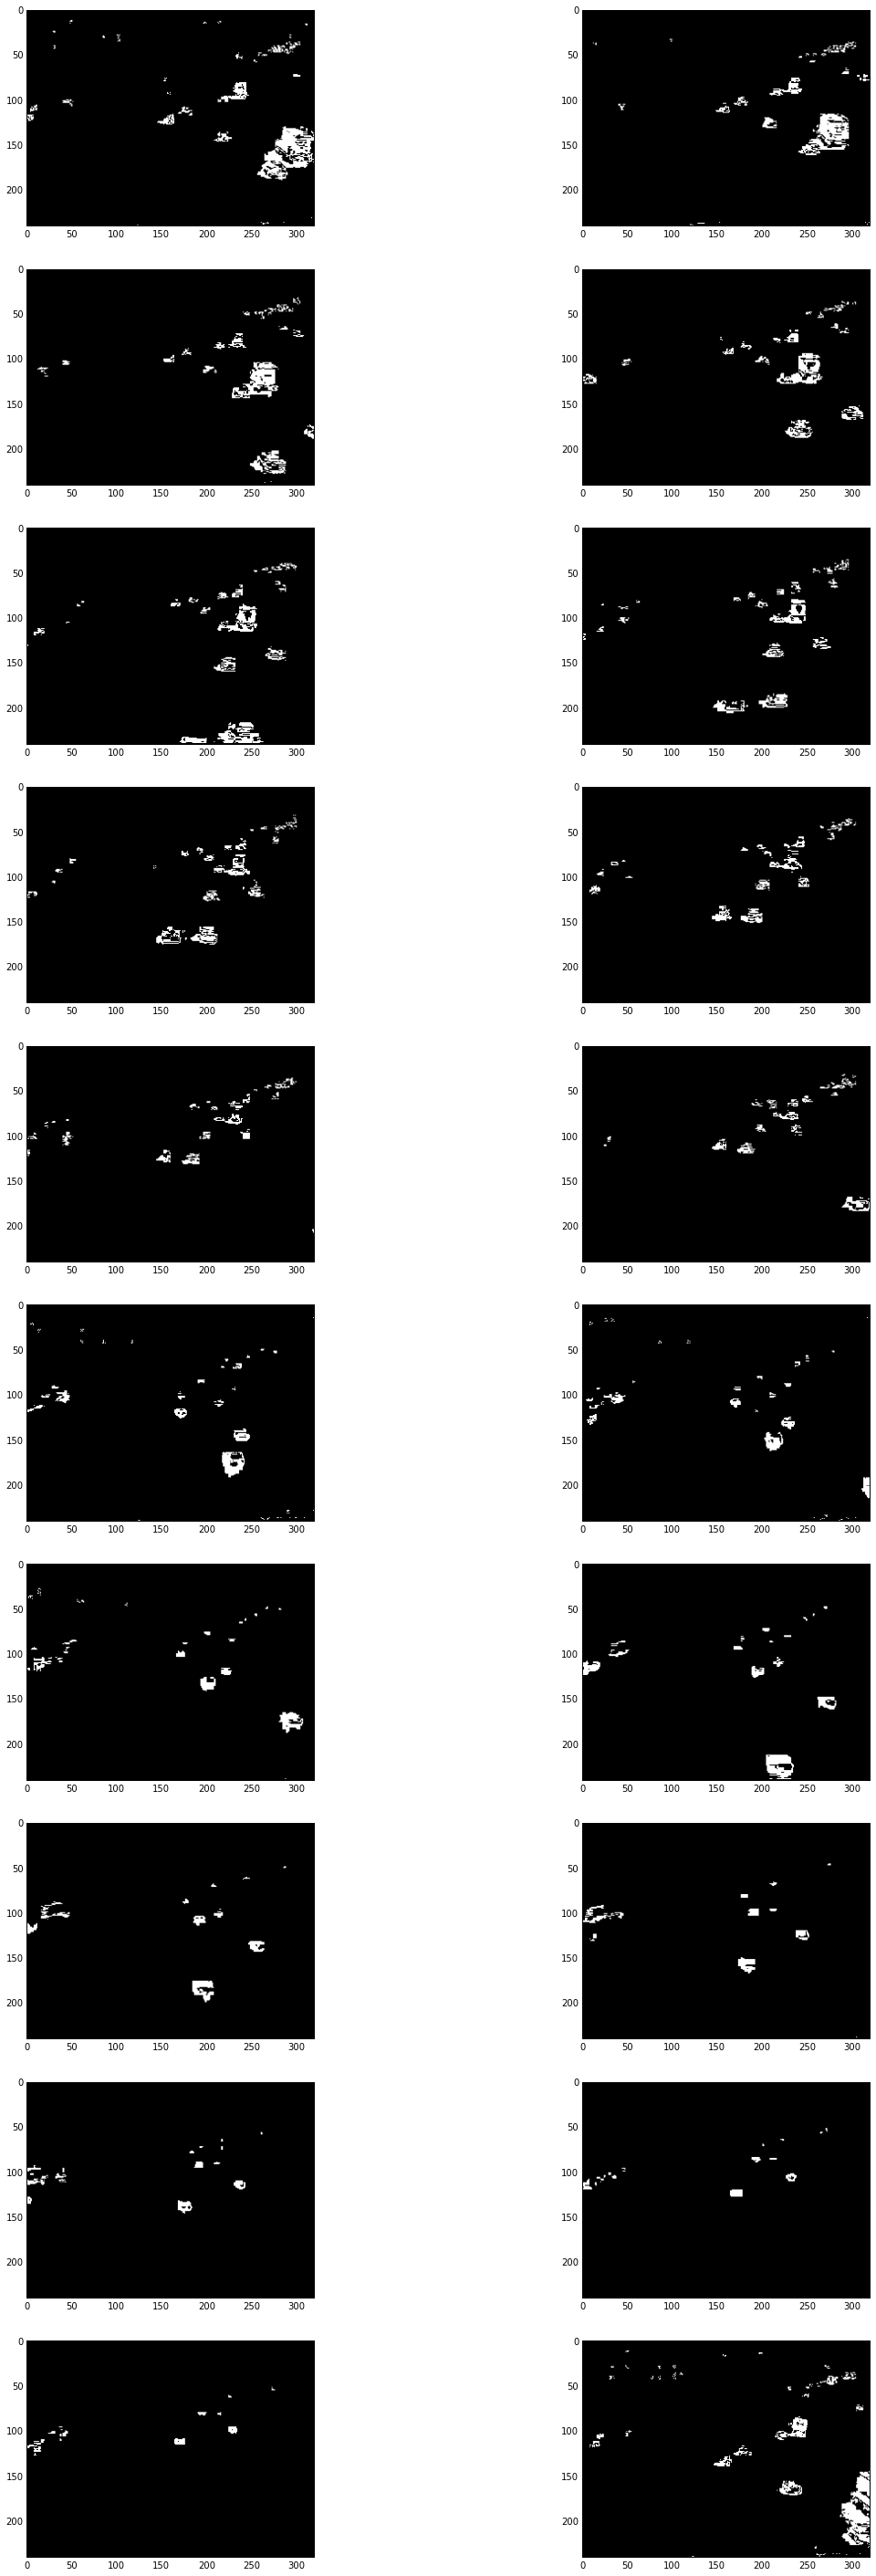

In [141]:
plt.figure(figsize=(20,50))
for frame in range(0,100,5):
    plt.subplot(10,2,frame/5)
    plt.imshow(get_cars(frame))

In [136]:
plt.subplot?

In [145]:
import bg_substraction

In [149]:
bg_substraction.background_substraction('X_test.npy' , "X_test_videos.npy" , "X_test_avg.npy" , 'X_test_no_bg.npy')

KeyboardInterrupt: 

In [155]:
for (i,j,k) in np.ndenumerate(X_train[0]):
    print i,j,k

ValueError: need more than 2 values to unpack

TypeError: range() integer end argument expected, got tuple.